# Python Lecture 9: Statistical Methods
## Jarret Petrillo copyright 2020
## AMS 595

# Today's Goal

## Use SciPy for Advanced Statistics

1. descriptive statistics
1. histogram
2. clustering

reference: *Learning SciPy for Numerical and Scientific Computing* by Blanco-Silva

In [78]:
import numpy as np

data = np.array([[113,105,130,101,138,118,87,116,75,96, \
                122,103,116,107,118,103,111,104,111,89,78,100,89,85,88], \
                [137,105,133,108,115,170,103,145,78,107, \
                84,148,147,87,166,146,123,135,112,93,76,116,78,101,123]])

dataDiff = data[1,:] - data[0,:]

dataDiff.mean()

13.32

In [89]:
from scipy.stats import skew, kurtosis, moment

print("skew:", skew(dataDiff))

print("kurtosis:", kurtosis(dataDiff))

print("10th moment:", moment(dataDiff,10))

skew: -0.21732640009634038
kurtosis: -0.43435210462112916
10th moment: 5762895839668391.0


(array([1., 1., 1., 1., 6., 3., 4., 3., 1., 4.]),
 array([-38., -29., -20., -11.,  -2.,   7.,  16.,  25.,  34.,  43.,  52.]),
 <a list of 10 Patch objects>)

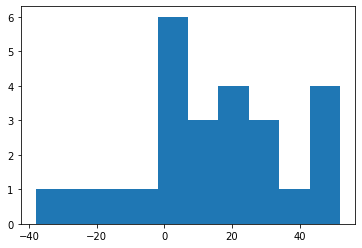

In [45]:
import matplotlib.pyplot as plt

plt.hist(dataDiff) # y-axis are counts

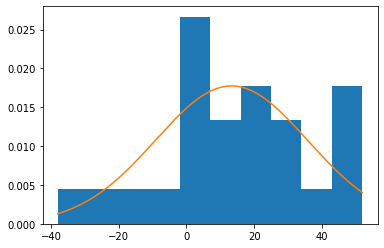

In [46]:
# is it Gausian?

from scipy.stats import norm

mean, std = norm.fit(dataDiff) # estimate normal distribution params
plt.hist(dataDiff, density=True) # y-axis = probability
x=np.linspace(dataDiff.min(),dataDiff.max(),1000)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf)

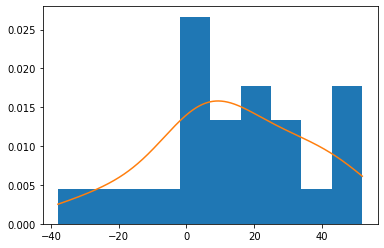

In [47]:
# kernel density plot is more general

from scipy.stats import kde

kernel_density = kde.gaussian_kde(dataDiff)
plt.hist(dataDiff, density=True) # y-axis = probability
pdf = kernel_density.pdf(x)
plt.plot(x, pdf)

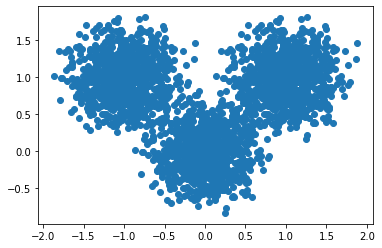

In [74]:
# generate cluster data

from scipy.stats import norm
import numpy
from numpy import array,vstack

data=norm.rvs(0,0.3,size=(1000,2))

inside_ball=numpy.hypot(data[:,0],data[:,1])<1.0
data=data[inside_ball]
data = vstack((data, data+array([1,1]),data+array([-1,1])))

plt.scatter(data[:,0], data[:,1])

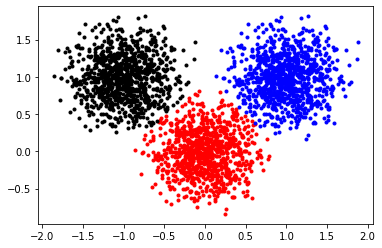

In [77]:
# cluster using kmeans algorithm

from scipy.cluster.vq import kmeans, vq

centroids, distortion = kmeans(data,3)

cluster_assignment, distances = vq(data,centroids)
plot(data[cluster_assignment==0,0], \
    data[cluster_assignment==0,1], 'r.')
plot(data[cluster_assignment==1,0], \
    data[cluster_assignment==1,1], 'b.')
plot(data[cluster_assignment==2,0], \
    data[cluster_assignment==2,1], 'k.')